In [1]:
# !pip3 install import-ipynb

## Import Module

In [2]:
import struct
import numpy as np
import pandas as pd
# import import_ipynb
from importnb import Notebook
with Notebook(): 
    import NN_HW3_sm as Nn
from tqdm import tqdm, trange, notebook
from matplotlib import pyplot as plt

0 's round !!!
test2 output:  [0.04266473]
1 's round !!!
test2 output:  [0.97675791]
2 's round !!!
test2 output:  [0.63333963]
3 's round !!!
test2 output:  [0.70760012]
4 's round !!!
test2 output:  [0.69894287]
5 's round !!!
test2 output:  [0.70014387]
6 's round !!!
test2 output:  [0.69998036]
7 's round !!!
test2 output:  [0.70000268]
8 's round !!!
test2 output:  [0.69999963]
9 's round !!!
test2 output:  [0.70000005]
10 's round !!!
test2 output:  [0.69999999]
11 's round !!!
test2 output:  [0.7]
12 's round !!!
test2 output:  [0.7]
13 's round !!!
test2 output:  [0.7]
14 's round !!!
test2 output:  [0.7]
15 's round !!!
test2 output:  [0.7]
16 's round !!!
test2 output:  [0.7]
17 's round !!!
test2 output:  [0.7]
18 's round !!!
test2 output:  [0.7]
19 's round !!!
test2 output:  [0.7]


## Data Variable

In [3]:
tag_name = ["age", "workclass", "fnlwgt", "edu", "education-num", "marital", "occup", "relation", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "country", "result"]
data_size = [7, 4, 21, 5, 6, 3, 4, 3, 3, 1, 20, 13, 7, 6, 2]

## Read Data Function

In [4]:
def read_data(image_dir, label_dir):
    with open(image_dir, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        
        buf = file.read(size * rows * cols)
        img_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        img_data = img_data.reshape(size, rows*cols)
        img_data = img_data / 255
        
    
    with open(label_dir, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        
        buf = file.read(size)
        lab_data_tmp = np.frombuffer(buf, dtype=np.uint8).astype(np.uint16)
        lab_data_tmp = lab_data_tmp.reshape(size)
        
#     print(lab_data[0:111])
    lab_data = np.zeros((size, 10), dtype=np.uint16)
    for i in range(size):
        lab_data[i][ lab_data_tmp[i] ] = 1
    
#     print(lab_data[0:10])
    
    
    return img_data.copy(), lab_data.copy()

In [5]:
# print(np.frombuffer(b'\x02\x01\x00\x00', dtype=np.uint16))
train_data, train_label  = read_data('./MNIST/train-images-idx3-ubyte', './MNIST/train-labels-idx1-ubyte')
test_data, test_label  = read_data('./MNIST/t10k-images-idx3-ubyte', './MNIST/t10k-labels-idx1-ubyte')

## Dataset Label

In [6]:
def preprocess_input(x):
    return x

ans = preprocess_input(train_data[0])
ans1 = preprocess_input(test_data[1])
print(ans)
print(ans1)
# print(train_data[0:10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
def construct_model(model, input_arr, layer_num):
    for i, num in enumerate(layer_num):
        if i == 0:
            model.layer_list.append( Nn.Layer_vec(Nn.ReLU, Nn.d_ReLU, num, input_arr, True) )
#         elif i == len(layer_num)-1:
#             model.layer_list.append( Nn.Layer_vec(Nn.Sigmoid, Nn.d_ReLU, num, model.layer_list[i-1], False) )
        else:
            model.layer_list.append( Nn.Layer_vec(Nn.ReLU, Nn.d_ReLU, num, model.layer_list[i-1], False) )
    model.layer_list.append( Nn.Softmax_Output(model.layer_list[len(model.layer_list)-1]) )
    print(model.layer_list)
            

In [15]:
##############################################################
#                         MODEL block                        #
##############################################################

with Notebook(): 
    import NN_HW3_sm as Nn
# lr_rate = 0.00009
epochs = 500

lr_rate = 0.001
layer_nums = [20, 20, 20, 10]
# layer_nums = [train_data.shape[1]-1, 7, 1]
layer_input = preprocess_input(train_data[0])
test_m = Nn.Model(layer_nums, construct_model, layer_input, lr_rate)

train_loss = []
test_loss = []
train_acc = []
test_acc = []
output_node_w = [[]]
output_node_w = np.array([test_m.get_output_w()])

for epoch in range(epochs):
    train_err_cnt = 0
    train_error = []
    print(epoch+1, "/", epochs, "epochs")
    train_progress = notebook.tqdm(total=len(train_data), desc="Training")
    test_progress = notebook.tqdm(total=len(test_data), desc="Testing")
    for i, input_data in enumerate(train_data):
#     for i, input_data in enumerate(train_data[0:10]):
#         print(i, "'s data !!!")
#         print(input_data)
        train_progress.update(1)
        p_data = preprocess_input(input_data)
        test_m.cal_network(p_data)
        ans_conf = test_m.get_result()
        ans = np.argmax(ans_conf)
        std = np.argmax(train_label[i])
        if ans != std:
            train_err_cnt += 1
        
        # Adjust model weights
        p_loss = test_m.adjust_model(train_label[i])
#         print(p_loss)
        train_error.append(p_loss)
#         print("ans_conf:　", ans_conf, "ans: ", ans, "train_label[i]:　", train_label[i], "std: ", std, "p_loss: ", p_loss)
        
    output_node_w = np.append(output_node_w, [test_m.get_output_w()], 0)
        
    train_loss.append(np.average(train_error))
    train_acc.append(1 - train_err_cnt/len(train_data) )
    print("Train loss: ", np.average(train_error), ", acc = ", (1-train_err_cnt/len(train_data)) * 100, "%")
    test_err_cnt = 0
    test_error = []
    for i, input_data in enumerate(test_data):
#     for i, input_data in enumerate(test_data[0:10]):
        # print(i, "'s data !!!")
        test_progress.update(1)
        
        p_data = preprocess_input(input_data)
        test_m.cal_network(p_data)
        ans_conf = test_m.get_result()
        ans = np.argmax(ans_conf)
        std = np.argmax(test_label[i])
        if ans != std:
            test_err_cnt += 1
        
        
        p_loss = test_m.get_loss(test_label[i])
        test_error.append(p_loss)
        
        
    test_loss.append(np.average(test_error))
    test_acc.append(1 - test_err_cnt/len(test_data) )
    print("Test loss: ", np.average(test_error), ", acc = ", (1-test_err_cnt/len(test_data)) * 100, "%")
    print()
test_m.get_loss()

[<NN_HW3_sm.Layer_vec object at 0x00000203F65C6E48>, <NN_HW3_sm.Layer_vec object at 0x00000203F6523B38>, <NN_HW3_sm.Layer_vec object at 0x00000203F65C6F60>, <NN_HW3_sm.Layer_vec object at 0x00000203F65C6F98>, <NN_HW3_sm.Softmax_Output object at 0x00000203F65C6E10>]
1 / 500 epochs


Train loss:  1.0480196332594245 , acc =  65.18833333333333 %
Test loss:  0.7584621574211237 , acc =  72.87 %

2 / 500 epochs


Train loss:  0.7133614185446886 , acc =  73.92833333333333 %
Test loss:  0.6872258478222455 , acc =  74.51 %

3 / 500 epochs


Train loss:  0.6614945091258503 , acc =  75.10833333333333 %
Test loss:  0.6537343948737453 , acc =  75.33999999999999 %

4 / 500 epochs


Train loss:  0.6324513072004787 , acc =  75.75 %
Test loss:  0.6325689301045552 , acc =  76.0 %

5 / 500 epochs


Train loss:  0.5580749574882478 , acc =  78.865 %
Test loss:  0.4204020300398526 , acc =  84.89999999999999 %

6 / 500 epochs


Train loss:  0.3949092852709395 , acc =  85.67333333333333 %
Test loss:  0.40491213588506403 , acc =  85.38 %

7 / 500 epochs


Train loss:  0.37648246211573444 , acc =  86.12333333333333 %
Test loss:  0.3970974745703072 , acc =  85.66 %

8 / 500 epochs


Train loss:  0.3655414874962551 , acc =  86.38666666666667 %
Test loss:  0.3963220474828433 , acc =  85.65 %

9 / 500 epochs


Train loss:  0.35779858557867317 , acc =  86.56 %
Test loss:  0.3956037973905606 , acc =  85.65 %

10 / 500 epochs


Train loss:  0.3512416359739135 , acc =  86.7 %
Test loss:  0.39384632572766975 , acc =  85.75 %

11 / 500 epochs


Train loss:  0.3460678269724301 , acc =  86.84333333333333 %
Test loss:  0.3911806855465723 , acc =  85.75 %

12 / 500 epochs


Train loss:  0.3416075416138475 , acc =  86.97500000000001 %
Test loss:  0.3901714647475843 , acc =  85.91 %

13 / 500 epochs


Train loss:  0.33756807552111445 , acc =  87.095 %
Test loss:  0.38509560463731907 , acc =  86.07000000000001 %

14 / 500 epochs


Train loss:  0.33413971064170267 , acc =  87.16833333333334 %
Test loss:  0.38863950821655935 , acc =  85.94 %

15 / 500 epochs


Train loss:  0.3308339297578255 , acc =  87.23833333333333 %
Test loss:  0.3825039904325819 , acc =  86.04 %

16 / 500 epochs


Train loss:  0.3280439091065046 , acc =  87.3 %
Test loss:  0.3817248238173022 , acc =  86.09 %

17 / 500 epochs


Train loss:  0.32560365696056476 , acc =  87.38333333333334 %
Test loss:  0.378423164559298 , acc =  86.19 %

18 / 500 epochs


Train loss:  0.32323272200763936 , acc =  87.425 %
Test loss:  0.3749316555549204 , acc =  86.26 %

19 / 500 epochs


Train loss:  0.3209747693794158 , acc =  87.515 %
Test loss:  0.37337396537102074 , acc =  86.28 %

20 / 500 epochs


Train loss:  0.3184162840186192 , acc =  87.55166666666668 %
Test loss:  0.37677409482296786 , acc =  86.21 %

21 / 500 epochs


Train loss:  0.31647651214653033 , acc =  87.62333333333333 %
Test loss:  0.37626570182426455 , acc =  86.28 %

22 / 500 epochs


Train loss:  0.31414666686606757 , acc =  87.69666666666667 %
Test loss:  0.3771865315660423 , acc =  86.22 %

23 / 500 epochs


Train loss:  0.31312824356648383 , acc =  87.71166666666666 %
Test loss:  0.3819103792580537 , acc =  86.09 %

24 / 500 epochs
































Train loss:  0.3108034483341672 , acc =  87.785 %
Test loss:  0.3804064830474603 , acc =  86.42 %

25 / 500 epochs


Train loss:  0.3100784341418606 , acc =  87.77666666666667 %
Test loss:  0.38395238313134417 , acc =  86.38 %

26 / 500 epochs


Train loss:  0.3085042450973676 , acc =  87.80666666666667 %
Test loss:  0.3854152628645264 , acc =  86.28 %

27 / 500 epochs


Train loss:  0.30771508193126207 , acc =  87.835 %
Test loss:  0.38868035706471593 , acc =  86.18 %

28 / 500 epochs


Train loss:  0.307322967813074 , acc =  87.8 %
Test loss:  0.38785623471845376 , acc =  86.19 %

29 / 500 epochs


Train loss:  0.30510619277404183 , acc =  87.89166666666667 %
Test loss:  0.38859035493412114 , acc =  86.29 %

30 / 500 epochs


Train loss:  0.3044209616266254 , acc =  87.94166666666666 %
Test loss:  0.400993702443026 , acc =  86.11 %

31 / 500 epochs


Train loss:  0.30310008919658993 , acc =  87.96333333333334 %
Test loss:  0.3892804811933278 , acc =  86.33 %

32 / 500 epochs


Train loss:  0.3026347402574919 , acc =  87.96000000000001 %
Test loss:  0.39825949413893874 , acc =  86.14999999999999 %

33 / 500 epochs


Train loss:  0.3020754581756055 , acc =  87.965 %
Test loss:  0.39784233317504075 , acc =  86.21 %

34 / 500 epochs


Train loss:  0.3002544779391164 , acc =  88.01833333333333 %
Test loss:  0.4166914254455126 , acc =  85.83000000000001 %

35 / 500 epochs


Train loss:  0.30116847255328255 , acc =  87.985 %
Test loss:  0.3965544277322471 , acc =  86.23 %

36 / 500 epochs


Train loss:  0.29985212822207963 , acc =  88.04833333333333 %
Test loss:  0.4155773841476594 , acc =  85.89 %

37 / 500 epochs


Train loss:  0.29772959472689875 , acc =  88.06666666666668 %
Test loss:  0.40633927105385476 , acc =  86.14999999999999 %

38 / 500 epochs


Train loss:  0.2981400182158592 , acc =  88.03833333333333 %
Test loss:  0.40289362007860763 , acc =  86.2 %

39 / 500 epochs


Train loss:  0.2978505319479501 , acc =  88.08666666666667 %
Test loss:  0.42333752669783115 , acc =  85.8 %

40 / 500 epochs


Train loss:  0.29665409899903644 , acc =  88.04666666666667 %
Test loss:  0.4030069875766771 , acc =  86.32 %

41 / 500 epochs


Train loss:  0.29698795507135084 , acc =  88.07833333333333 %
Test loss:  0.41656921741803926 , acc =  85.98 %

42 / 500 epochs


Train loss:  0.297021220572164 , acc =  88.03833333333333 %
Test loss:  0.4051654346213948 , acc =  86.21 %

43 / 500 epochs


Train loss:  0.2954338761159351 , acc =  88.07333333333334 %
Test loss:  0.41112100996259204 , acc =  86.09 %

44 / 500 epochs


Train loss:  0.29395879956825477 , acc =  88.14999999999999 %
Test loss:  0.4175668463532298 , acc =  86.0 %

45 / 500 epochs


Train loss:  0.2959792783819815 , acc =  88.045 %
Test loss:  0.4117087324357489 , acc =  86.11999999999999 %

46 / 500 epochs


Train loss:  0.29424547184728195 , acc =  88.09 %
Test loss:  0.4135514250838665 , acc =  86.06 %

47 / 500 epochs


Train loss:  0.293914942380717 , acc =  88.12666666666667 %
Test loss:  0.4263840161034697 , acc =  85.88 %

48 / 500 epochs


Train loss:  0.29213805943949467 , acc =  88.17833333333334 %
Test loss:  0.4097618303207279 , acc =  86.21 %

49 / 500 epochs


Train loss:  0.29138161748807073 , acc =  88.16 %
Test loss:  0.4249499512605218 , acc =  85.79 %

50 / 500 epochs


Train loss:  0.29190963174524176 , acc =  88.18166666666667 %
Test loss:  0.42592879302406217 , acc =  85.94 %

51 / 500 epochs


Train loss:  0.29186140838303165 , acc =  88.17 %
Test loss:  0.4244385881116331 , acc =  86.00999999999999 %

52 / 500 epochs


Train loss:  0.2932820933370204 , acc =  88.115 %
Test loss:  0.419184349873233 , acc =  86.23 %

53 / 500 epochs


Train loss:  0.2905026268282227 , acc =  88.16333333333334 %
Test loss:  0.420512412674574 , acc =  86.07000000000001 %

54 / 500 epochs


Train loss:  0.29233228748291873 , acc =  88.10166666666667 %
Test loss:  0.4569530174663598 , acc =  85.42 %

55 / 500 epochs






























Train loss:  0.29054732894766444 , acc =  88.17166666666667 %
Test loss:  0.43437807612923535 , acc =  85.99 %

56 / 500 epochs


Train loss:  0.290590194296957 , acc =  88.17333333333333 %
Test loss:  0.44164963796551093 , acc =  85.89 %

57 / 500 epochs


Train loss:  0.29009345945507586 , acc =  88.17833333333334 %
Test loss:  0.42698078254101257 , acc =  86.17 %

58 / 500 epochs


Train loss:  0.290001074592352 , acc =  88.15666666666667 %
Test loss:  0.4440484246873739 , acc =  86.0 %

59 / 500 epochs


Train loss:  0.28879815457625263 , acc =  88.22333333333333 %
Test loss:  0.4317893038337197 , acc =  86.11999999999999 %

60 / 500 epochs


Train loss:  0.28921619577745517 , acc =  88.19 %
Test loss:  0.43214839269497235 , acc =  85.92 %

61 / 500 epochs


Train loss:  0.28814683748560116 , acc =  88.25666666666667 %
Test loss:  0.41977975155741826 , acc =  86.17 %

62 / 500 epochs


Train loss:  0.2882308642398709 , acc =  88.225 %
Test loss:  0.42658320260215477 , acc =  86.03 %

63 / 500 epochs


Train loss:  0.2865564989409042 , acc =  88.28 %
Test loss:  0.45919563902435584 , acc =  85.66 %

64 / 500 epochs


Train loss:  0.2898323470548385 , acc =  88.155 %
Test loss:  0.44300635323728205 , acc =  85.94 %

65 / 500 epochs


Train loss:  0.2852463145622428 , acc =  88.345 %
Test loss:  0.46547067233757217 , acc =  85.58 %

66 / 500 epochs


Train loss:  0.2850590638942701 , acc =  88.32166666666666 %
Test loss:  0.4575632927908269 , acc =  85.77 %

67 / 500 epochs


Train loss:  0.28411458504140247 , acc =  88.33 %
Test loss:  0.45317543063913757 , acc =  85.87 %

68 / 500 epochs


Train loss:  0.28729922135714925 , acc =  88.22666666666666 %
Test loss:  0.43441969267239666 , acc =  86.33 %

69 / 500 epochs


Train loss:  0.2841317090744121 , acc =  88.31833333333333 %
Test loss:  0.4438675086664418 , acc =  86.00999999999999 %

70 / 500 epochs


Train loss:  0.2876088528402518 , acc =  88.21333333333334 %
Test loss:  0.44306192756568197 , acc =  86.17 %

71 / 500 epochs


Train loss:  0.28301321149526615 , acc =  88.36166666666668 %
Test loss:  0.4427763237674655 , acc =  86.19 %

72 / 500 epochs


Train loss:  0.284207890864602 , acc =  88.33666666666666 %
Test loss:  0.4531263132904117 , acc =  85.89 %

73 / 500 epochs


Train loss:  0.28637708976377846 , acc =  88.20166666666667 %
Test loss:  0.4613953922311799 , acc =  86.02 %

74 / 500 epochs


Train loss:  0.2865942689083426 , acc =  88.29666666666667 %
Test loss:  0.44433582713545583 , acc =  86.05000000000001 %

75 / 500 epochs


Train loss:  0.2837708900251182 , acc =  88.31833333333333 %
Test loss:  0.4407906574630223 , acc =  86.21 %

76 / 500 epochs


Train loss:  0.2827541018555992 , acc =  88.35833333333333 %
Test loss:  0.4548992921496574 , acc =  86.00999999999999 %

77 / 500 epochs


Train loss:  0.28409202549111096 , acc =  88.29166666666667 %
Test loss:  0.4467126405818452 , acc =  86.05000000000001 %

78 / 500 epochs


Train loss:  0.2830584291632855 , acc =  88.34333333333333 %
Test loss:  0.44611914926808466 , acc =  86.11999999999999 %

79 / 500 epochs


Train loss:  0.28208395182357127 , acc =  88.335 %
Test loss:  0.4587289644728229 , acc =  85.84 %

80 / 500 epochs


Train loss:  0.28172067177293236 , acc =  88.35666666666665 %
Test loss:  0.5078604543067343 , acc =  85.33999999999999 %

81 / 500 epochs


Train loss:  0.28667787231810893 , acc =  88.22333333333333 %
Test loss:  0.47366841783433855 , acc =  85.8 %

82 / 500 epochs


Train loss:  0.2855654199004175 , acc =  88.275 %
Test loss:  0.4439170498709899 , acc =  86.13 %

83 / 500 epochs


Train loss:  0.2829291418175381 , acc =  88.34333333333333 %
Test loss:  0.4510934196705113 , acc =  86.11999999999999 %

84 / 500 epochs


Train loss:  0.2785684467904404 , acc =  88.45333333333333 %
Test loss:  0.4550760750489575 , acc =  86.16 %

85 / 500 epochs


Train loss:  0.28293698945920437 , acc =  88.345 %
Test loss:  0.5045453249835078 , acc =  85.57000000000001 %

86 / 500 epochs


Train loss:  0.2827030097207311 , acc =  88.31 %
Test loss:  0.47356537067028204 , acc =  85.94 %

87 / 500 epochs


Train loss:  0.28064580001084916 , acc =  88.46333333333334 %
Test loss:  0.47050503321266207 , acc =  85.98 %

88 / 500 epochs


Train loss:  0.28110607111734315 , acc =  88.36 %
Test loss:  0.46581729414940365 , acc =  86.17 %

89 / 500 epochs


Train loss:  0.28216513491728223 , acc =  88.36500000000001 %
Test loss:  0.4886032830512091 , acc =  85.88 %

90 / 500 epochs


Train loss:  0.2814126759972529 , acc =  88.40666666666667 %
Test loss:  0.4784459044471463 , acc =  86.06 %

91 / 500 epochs


Train loss:  0.28108098634944023 , acc =  88.34833333333333 %
Test loss:  0.460745273258171 , acc =  86.19 %

92 / 500 epochs


Train loss:  0.27786211137581207 , acc =  88.44666666666666 %
Test loss:  0.454951253133313 , acc =  85.94999999999999 %

93 / 500 epochs


Train loss:  0.28141829906781496 , acc =  88.4 %
Test loss:  0.45025967644756437 , acc =  86.11 %

94 / 500 epochs


Train loss:  0.2782587745490441 , acc =  88.42833333333333 %
Test loss:  0.4622011169780857 , acc =  86.05000000000001 %

95 / 500 epochs


Train loss:  0.28021256152180163 , acc =  88.44999999999999 %
Test loss:  0.452994934565199 , acc =  86.35 %

96 / 500 epochs


Train loss:  0.27838994175435505 , acc =  88.42999999999999 %
Test loss:  0.49272420427781 , acc =  85.85000000000001 %

97 / 500 epochs


Train loss:  0.28036974365672684 , acc =  88.41499999999999 %
Test loss:  0.4723629164473165 , acc =  86.14999999999999 %

98 / 500 epochs


Train loss:  0.2791083885534647 , acc =  88.41166666666666 %
Test loss:  0.4715141378165077 , acc =  86.25 %

99 / 500 epochs


Train loss:  0.2756072282237659 , acc =  88.51833333333333 %
Test loss:  0.4690228776808128 , acc =  86.14999999999999 %

100 / 500 epochs


Train loss:  0.27886132150837156 , acc =  88.41499999999999 %
Test loss:  0.49092897927212437 , acc =  86.11999999999999 %

101 / 500 epochs


Train loss:  0.2822530218396411 , acc =  88.38000000000001 %
Test loss:  0.4969024704170148 , acc =  85.79 %

102 / 500 epochs


Train loss:  0.27919855663594373 , acc =  88.44833333333332 %
Test loss:  0.4817751649413598 , acc =  86.06 %

103 / 500 epochs


Train loss:  0.2844347578614381 , acc =  88.30833333333334 %
Test loss:  0.4930606578751028 , acc =  85.63000000000001 %

104 / 500 epochs






























Train loss:  0.2790401241621453 , acc =  88.45166666666667 %
Test loss:  0.48038685794378616 , acc =  85.8 %

105 / 500 epochs


Train loss:  0.2779102746950782 , acc =  88.48 %
Test loss:  0.4866365100653793 , acc =  85.57000000000001 %

106 / 500 epochs


Train loss:  0.2782183794227842 , acc =  88.46833333333333 %
Test loss:  0.46439711695865155 , acc =  85.94999999999999 %

107 / 500 epochs


Train loss:  0.279092571103568 , acc =  88.38833333333334 %
Test loss:  0.5162957371952867 , acc =  85.52 %

108 / 500 epochs


Train loss:  0.2787943628918034 , acc =  88.45666666666668 %
Test loss:  0.47295186275804124 , acc =  86.3 %

109 / 500 epochs


Train loss:  0.276478618287751 , acc =  88.48166666666667 %
Test loss:  0.48928874084080126 , acc =  85.9 %

110 / 500 epochs


Train loss:  0.2818260389560006 , acc =  88.35833333333333 %
Test loss:  0.47822427441287807 , acc =  86.06 %

111 / 500 epochs


Train loss:  0.27961435852818073 , acc =  88.44333333333333 %
Test loss:  0.4865048566273689 , acc =  85.97 %

112 / 500 epochs


Train loss:  0.27957091710841764 , acc =  88.435 %
Test loss:  0.4729984133237528 , acc =  85.92999999999999 %

113 / 500 epochs


Train loss:  0.27573760837471545 , acc =  88.515 %
Test loss:  0.48188261839241475 , acc =  86.07000000000001 %

114 / 500 epochs


Train loss:  0.27691245660081715 , acc =  88.53666666666666 %
Test loss:  0.4807614895002508 , acc =  85.9 %

115 / 500 epochs


Train loss:  0.2765619132104798 , acc =  88.48166666666667 %
Test loss:  0.4853733000800405 , acc =  86.14 %

116 / 500 epochs


Train loss:  0.2786162765008175 , acc =  88.47333333333334 %
Test loss:  0.4745093084409309 , acc =  86.03 %

117 / 500 epochs


Train loss:  0.2765391078064316 , acc =  88.48666666666666 %
Test loss:  0.49708586276327243 , acc =  85.64 %

118 / 500 epochs


Train loss:  0.2751448336301835 , acc =  88.52499999999999 %
Test loss:  0.465696056588843 , acc =  86.32 %

119 / 500 epochs


Train loss:  0.2764953533111206 , acc =  88.47 %
Test loss:  0.4691920925046951 , acc =  86.07000000000001 %

120 / 500 epochs


Train loss:  0.2776925083615992 , acc =  88.49166666666667 %































Test loss:  0.4790879282415035 , acc =  86.42 %

121 / 500 epochs


Train loss:  0.27580190149178935 , acc =  88.51333333333334 %
Test loss:  0.48539434656990127 , acc =  86.3 %

122 / 500 epochs


Train loss:  0.28104994724330234 , acc =  88.38666666666667 %
Test loss:  0.513422380418436 , acc =  85.96000000000001 %

123 / 500 epochs


Train loss:  0.27661703683094735 , acc =  88.50333333333333 %
Test loss:  0.4980707738166514 , acc =  86.11 %

124 / 500 epochs


Train loss:  0.279518096771514 , acc =  88.43833333333333 %
Test loss:  0.48825017179348423 , acc =  86.29 %

125 / 500 epochs


Train loss:  0.27601186180926573 , acc =  88.51666666666667 %
Test loss:  0.4836287523273513 , acc =  86.29 %

126 / 500 epochs


Train loss:  0.2729856057087641 , acc =  88.575 %
Test loss:  0.5384799198637872 , acc =  85.38 %

127 / 500 epochs


Train loss:  0.282816480157348 , acc =  88.40166666666667 %
Test loss:  0.49568217281869864 , acc =  86.18 %

128 / 500 epochs


Train loss:  0.2739958453551356 , acc =  88.58333333333334 %
Test loss:  0.49074447057742654 , acc =  86.14999999999999 %

129 / 500 epochs


Train loss:  0.2771136550176497 , acc =  88.485 %
Test loss:  0.49787417055726707 , acc =  85.96000000000001 %

130 / 500 epochs


Train loss:  0.2776971520921975 , acc =  88.46833333333333 %
Test loss:  0.4732750027539746 , acc =  86.27 %

131 / 500 epochs


Train loss:  0.27017185605115435 , acc =  88.74333333333333 %
Test loss:  0.49953799221994966 , acc =  86.06 %

132 / 500 epochs


Train loss:  0.2736222834647776 , acc =  88.56666666666668 %
Test loss:  0.5053352428871618 , acc =  86.25 %

133 / 500 epochs


Train loss:  0.27722862248576896 , acc =  88.47333333333334 %
Test loss:  0.4908177154380024 , acc =  86.04 %

134 / 500 epochs


Train loss:  0.27671184136388705 , acc =  88.47333333333334 %
Test loss:  0.4978859841868456 , acc =  86.2 %

135 / 500 epochs


Train loss:  0.2751373395660854 , acc =  88.485 %
Test loss:  0.48387192887585845 , acc =  86.3 %

136 / 500 epochs


Train loss:  0.27445926547541905 , acc =  88.55 %
Test loss:  0.5640959586156491 , acc =  85.13999999999999 %

137 / 500 epochs


Train loss:  0.2776854451224253 , acc =  88.505 %
Test loss:  0.530315311841627 , acc =  85.63000000000001 %

138 / 500 epochs


Train loss:  0.2745064366496493 , acc =  88.575 %
Test loss:  0.484723332979093 , acc =  86.25 %

139 / 500 epochs


Train loss:  0.2742841132991732 , acc =  88.56833333333334 %
Test loss:  0.5061173307832152 , acc =  86.27 %

140 / 500 epochs


Train loss:  0.27771995288745155 , acc =  88.49833333333333 %
Test loss:  0.49098576856196324 , acc =  86.33 %

141 / 500 epochs


Train loss:  0.2765051985428839 , acc =  88.5 %
Test loss:  0.4905953260504706 , acc =  86.05000000000001 %

142 / 500 epochs


Train loss:  0.27555669219357215 , acc =  88.51833333333333 %
Test loss:  0.5125657328061011 , acc =  86.06 %

143 / 500 epochs


Train loss:  0.2794280122049736 , acc =  88.43166666666666 %
Test loss:  0.5577181941461635 , acc =  85.94 %

144 / 500 epochs


Train loss:  0.27520743103643236 , acc =  88.55333333333333 %
Test loss:  0.4852056024437812 , acc =  86.27 %

145 / 500 epochs


Train loss:  0.2772468418577731 , acc =  88.49000000000001 %
Test loss:  0.5182119535827752 , acc =  85.86 %

146 / 500 epochs


Train loss:  0.2700115008754063 , acc =  88.67166666666667 %
Test loss:  0.49176352304605386 , acc =  86.1 %

147 / 500 epochs


Train loss:  0.2734284281364939 , acc =  88.555 %
Test loss:  0.51175305484741 , acc =  86.14 %

148 / 500 epochs


Train loss:  0.2760684736986983 , acc =  88.50833333333334 %
Test loss:  0.5012084477704258 , acc =  86.14999999999999 %

149 / 500 epochs


Train loss:  0.2730584766864817 , acc =  88.57333333333334 %
Test loss:  0.5097534110492256 , acc =  85.98 %

150 / 500 epochs


Train loss:  0.2732344807501497 , acc =  88.60833333333333 %
Test loss:  0.5620405057954149 , acc =  85.68 %

151 / 500 epochs


Train loss:  0.27534813895355575 , acc =  88.54666666666667 %
Test loss:  0.49220461722158515 , acc =  86.43 %

152 / 500 epochs


Train loss:  0.2797470217188242 , acc =  88.46666666666667 %
Test loss:  0.5422258507846596 , acc =  85.77 %

153 / 500 epochs






























Train loss:  0.2731392200970049 , acc =  88.63666666666667 %
Test loss:  0.5436800533101045 , acc =  85.67 %

154 / 500 epochs


Train loss:  0.2748018957465042 , acc =  88.55166666666666 %
Test loss:  0.5142398856063319 , acc =  85.86 %

155 / 500 epochs


Train loss:  0.2732047718918439 , acc =  88.61333333333333 %
Test loss:  0.5404331602672567 , acc =  85.61999999999999 %

156 / 500 epochs


Train loss:  0.27293798722949864 , acc =  88.59166666666667 %
Test loss:  0.5102526301489829 , acc =  86.17 %

157 / 500 epochs


Train loss:  0.27762194959478426 , acc =  88.44166666666666 %
Test loss:  0.5049519320135589 , acc =  86.5 %

158 / 500 epochs


Train loss:  0.2727665276029774 , acc =  88.62833333333333 %
Test loss:  0.5491697236356781 , acc =  85.97 %

159 / 500 epochs


Train loss:  0.2772540801713439 , acc =  88.51666666666667 %
Test loss:  0.5309383690965281 , acc =  86.04 %

160 / 500 epochs


Train loss:  0.2726097352801394 , acc =  88.63333333333333 %
Test loss:  0.5430445467668107 , acc =  85.7 %

161 / 500 epochs


Train loss:  0.27933166493130596 , acc =  88.44333333333333 %
Test loss:  0.5366660222269571 , acc =  86.06 %

162 / 500 epochs


Train loss:  0.2754335752129917 , acc =  88.55833333333334 %
Test loss:  0.5416703490060754 , acc =  85.6 %

163 / 500 epochs


Train loss:  0.27116282695684796 , acc =  88.65833333333333 %
Test loss:  0.5178691711898952 , acc =  86.29 %

164 / 500 epochs


Train loss:  0.27549399795786644 , acc =  88.565 %
Test loss:  0.5050916036655123 , acc =  86.31 %

165 / 500 epochs


Train loss:  0.2734351148599665 , acc =  88.575 %
Test loss:  0.5187887107152677 , acc =  86.03 %

166 / 500 epochs


Train loss:  0.27209987307977807 , acc =  88.62 %
Test loss:  0.5357837751241066 , acc =  85.94999999999999 %

167 / 500 epochs


Train loss:  0.2735522563215039 , acc =  88.59666666666666 %
Test loss:  0.5778378052446468 , acc =  85.47 %

168 / 500 epochs


Train loss:  0.26948424343174365 , acc =  88.69666666666667 %
Test loss:  0.55235993084011 , acc =  85.53 %

169 / 500 epochs


Train loss:  0.27415718878680384 , acc =  88.555 %
Test loss:  0.5438535597929431 , acc =  86.05000000000001 %

170 / 500 epochs


Train loss:  0.2729344731182764 , acc =  88.60666666666667 %
Test loss:  0.5556520838979543 , acc =  85.92999999999999 %

171 / 500 epochs


Train loss:  0.2729263967031061 , acc =  88.61 %
Test loss:  0.5292306699307187 , acc =  85.99 %

172 / 500 epochs


Train loss:  0.27307558609729427 , acc =  88.66166666666666 %
Test loss:  0.5154210053296516 , acc =  86.0 %

173 / 500 epochs


Train loss:  0.2710083172934215 , acc =  88.655 %
Test loss:  0.5267297374621659 , acc =  86.1 %

174 / 500 epochs


Train loss:  0.2719179100882653 , acc =  88.65333333333334 %
Test loss:  0.5228795371231151 , acc =  86.29 %

175 / 500 epochs


Train loss:  0.2724142444044231 , acc =  88.63499999999999 %
Test loss:  0.5475845936033044 , acc =  85.77 %

176 / 500 epochs


Train loss:  0.27069147841228264 , acc =  88.66000000000001 %
Test loss:  0.5283076797982229 , acc =  86.17 %

177 / 500 epochs


Train loss:  0.2743884081600558 , acc =  88.595 %
Test loss:  0.5094772629528227 , acc =  86.2 %

178 / 500 epochs


Train loss:  0.2724568264955647 , acc =  88.62833333333333 %
Test loss:  0.5391819426193333 , acc =  86.08 %

179 / 500 epochs


Train loss:  0.27304651551498427 , acc =  88.62166666666667 %
Test loss:  0.5291454584220193 , acc =  85.94 %

180 / 500 epochs


Train loss:  0.2683103106641779 , acc =  88.72166666666666 %
Test loss:  0.5325118193718121 , acc =  86.14999999999999 %

181 / 500 epochs


Train loss:  0.26825299709787936 , acc =  88.69833333333334 %
Test loss:  0.5486173608836423 , acc =  85.92 %

182 / 500 epochs


Train loss:  0.26932110241471435 , acc =  88.66833333333334 %
Test loss:  0.5342514004706385 , acc =  86.26 %

183 / 500 epochs


Train loss:  0.2679685952512722 , acc =  88.72 %
Test loss:  0.5330897379897724 , acc =  86.07000000000001 %

184 / 500 epochs


Train loss:  0.2745159839385817 , acc =  88.59833333333333 %
Test loss:  0.5438665558519271 , acc =  86.27 %

185 / 500 epochs


Train loss:  0.2761820550176446 , acc =  88.5 %
Test loss:  0.5227327625353407 , acc =  86.11 %

186 / 500 epochs


Train loss:  0.2704246243476209 , acc =  88.71 %
Test loss:  0.5449049548227399 , acc =  86.0 %

187 / 500 epochs







































Train loss:  0.2684726798155551 , acc =  88.725 %
Test loss:  0.5616002853531032 , acc =  85.82 %

188 / 500 epochs


Train loss:  0.27334458933985256 , acc =  88.61833333333334 %
Test loss:  0.5339000281778485 , acc =  86.23 %

189 / 500 epochs


Train loss:  0.27005503129281283 , acc =  88.68333333333334 %
Test loss:  0.5815802899801764 , acc =  85.87 %

190 / 500 epochs


Train loss:  0.2782484174726366 , acc =  88.45833333333333 %
Test loss:  0.5483844158641379 , acc =  86.06 %

191 / 500 epochs


Train loss:  0.2758753705696167 , acc =  88.515 %
Test loss:  0.5742290185794156 , acc =  86.05000000000001 %

192 / 500 epochs


Train loss:  0.27128668652346016 , acc =  88.62333333333333 %
Test loss:  0.5456622154825499 , acc =  85.82 %

193 / 500 epochs


Train loss:  0.27471276807426614 , acc =  88.6 %
Test loss:  0.5330293405858906 , acc =  86.04 %

194 / 500 epochs


Train loss:  0.27411567174028373 , acc =  88.58333333333334 %
Test loss:  0.5511956553830661 , acc =  85.86 %

195 / 500 epochs


Train loss:  0.2686769487594332 , acc =  88.72333333333333 %
Test loss:  0.5649519863705982 , acc =  85.53999999999999 %

196 / 500 epochs


Train loss:  0.27233963861712035 , acc =  88.59833333333333 %
Test loss:  0.5523324226258534 , acc =  86.14 %

197 / 500 epochs


Train loss:  0.2695907925452709 , acc =  88.72833333333332 %
Test loss:  0.554545063253055 , acc =  86.0 %

198 / 500 epochs


Train loss:  0.27309602101922814 , acc =  88.62666666666667 %
Test loss:  0.6033719442974168 , acc =  85.61 %

199 / 500 epochs


Train loss:  0.2711538734542522 , acc =  88.64 %
Test loss:  0.5499177171130503 , acc =  86.18 %

200 / 500 epochs


Train loss:  0.2706161045979476 , acc =  88.64999999999999 %
Test loss:  0.5773758599981648 , acc =  85.87 %

201 / 500 epochs


Train loss:  0.272795042363554 , acc =  88.62833333333333 %
Test loss:  0.55108925510332 , acc =  86.19 %

202 / 500 epochs


Train loss:  0.2736753252449885 , acc =  88.58333333333334 %
Test loss:  0.5979796165204648 , acc =  85.28999999999999 %

203 / 500 epochs


Train loss:  0.2787662329396296 , acc =  88.485 %
Test loss:  0.555220518245086 , acc =  86.13 %

204 / 500 epochs


Train loss:  0.26970444990121917 , acc =  88.68 %
Test loss:  0.5758774207636708 , acc =  86.11999999999999 %

205 / 500 epochs


Train loss:  0.2684887135883549 , acc =  88.705 %
Test loss:  0.5711148505076954 , acc =  85.88 %

206 / 500 epochs


Train loss:  0.2701102761806936 , acc =  88.69166666666666 %
Test loss:  0.5623972497750794 , acc =  85.79 %

207 / 500 epochs


Train loss:  0.2694816575121736 , acc =  88.69833333333334 %
Test loss:  0.5498538176315589 , acc =  86.03 %

208 / 500 epochs


Train loss:  0.2654198607826095 , acc =  88.79 %
Test loss:  0.6219503225606154 , acc =  85.13999999999999 %

209 / 500 epochs


Train loss:  0.26995830295660517 , acc =  88.69833333333334 %
Test loss:  0.5774232770225104 , acc =  85.85000000000001 %

210 / 500 epochs


Train loss:  0.2712239358003254 , acc =  88.645 %
Test loss:  0.5446961765645162 , acc =  86.22 %

211 / 500 epochs


Train loss:  0.2756747580215728 , acc =  88.56166666666667 %
Test loss:  0.58885447369421 , acc =  85.47 %

212 / 500 epochs


Train loss:  0.2767183693261359 , acc =  88.595 %
Test loss:  0.5695627161352488 , acc =  85.94999999999999 %

213 / 500 epochs


Train loss:  0.2703931508181012 , acc =  88.68833333333333 %
Test loss:  0.565819035918775 , acc =  86.13 %

214 / 500 epochs


Train loss:  0.27237597082682347 , acc =  88.63333333333333 %
Test loss:  0.587116289170166 , acc =  85.92999999999999 %

215 / 500 epochs


Train loss:  0.26868095332396813 , acc =  88.72333333333333 %
Test loss:  0.5953836034837068 , acc =  85.86 %

216 / 500 epochs


Train loss:  0.2731391719367715 , acc =  88.60166666666667 %
Test loss:  0.6067174491674124 , acc =  85.65 %

217 / 500 epochs


Train loss:  0.28140777305661924 , acc =  88.44666666666666 %
Test loss:  0.6271835617255431 , acc =  85.39999999999999 %

218 / 500 epochs


Train loss:  0.2714970386867993 , acc =  88.67166666666667 %
Test loss:  0.5451930852279931 , acc =  86.06 %

219 / 500 epochs


Train loss:  0.27266764115453457 , acc =  88.645 %
Test loss:  0.5789134808560883 , acc =  85.8 %

220 / 500 epochs


Train loss:  0.27273354866961386 , acc =  88.61666666666666 %
Test loss:  0.577028096078864 , acc =  86.0 %

221 / 500 epochs


Train loss:  0.2683523171881714 , acc =  88.74833333333333 %
Test loss:  0.551813646119184 , acc =  86.03 %

222 / 500 epochs


Train loss:  0.2736581298790701 , acc =  88.60833333333333 %
Test loss:  0.5841266498123195 , acc =  85.94999999999999 %

223 / 500 epochs


Train loss:  0.27269703008769713 , acc =  88.63833333333334 %
Test loss:  0.5445635626692464 , acc =  85.9 %

224 / 500 epochs


Train loss:  0.27005955686768846 , acc =  88.70333333333333 %
Test loss:  0.575771467335887 , acc =  86.03 %

225 / 500 epochs


Train loss:  0.2725085761209705 , acc =  88.63166666666666 %
Test loss:  0.5947024982099467 , acc =  85.79 %

226 / 500 epochs


Train loss:  0.2784029832873003 , acc =  88.49000000000001 %
Test loss:  0.5720071012979122 , acc =  86.00999999999999 %

227 / 500 epochs


Train loss:  0.2695991136404441 , acc =  88.69 %
Test loss:  0.5761817518216878 , acc =  85.85000000000001 %

228 / 500 epochs


Train loss:  0.27084439934296667 , acc =  88.65666666666667 %
Test loss:  0.5487861123122358 , acc =  86.11 %

229 / 500 epochs


Train loss:  0.2732241119189968 , acc =  88.63499999999999 %
Test loss:  0.5653153658991424 , acc =  85.88 %

230 / 500 epochs


Train loss:  0.27623398034073054 , acc =  88.54666666666667 %
Test loss:  0.570910701541378 , acc =  85.81 %

231 / 500 epochs


Train loss:  0.2725799119325047 , acc =  88.62833333333333 %
Test loss:  0.5835796045677012 , acc =  86.09 %

232 / 500 epochs


Train loss:  0.27161647176124454 , acc =  88.68 %
Test loss:  0.5645417378730148 , acc =  86.17 %

233 / 500 epochs


Train loss:  0.2687837818093357 , acc =  88.72166666666666 %
Test loss:  0.5709555984296629 , acc =  86.06 %

234 / 500 epochs


Train loss:  0.26764625442051554 , acc =  88.73666666666666 %
Test loss:  0.5760004432115161 , acc =  85.71 %

235 / 500 epochs


Train loss:  0.27197223403711734 , acc =  88.6 %
Test loss:  0.6390503793144736 , acc =  84.86 %

236 / 500 epochs






























Train loss:  0.27849858830411045 , acc =  88.51 %
Test loss:  0.5806184968859104 , acc =  85.83000000000001 %

237 / 500 epochs


Train loss:  0.27388305735793844 , acc =  88.565 %
Test loss:  0.5636042305503955 , acc =  85.94 %

238 / 500 epochs


Train loss:  0.2655794027945637 , acc =  88.83333333333333 %
Test loss:  0.5761490410902114 , acc =  86.00999999999999 %

239 / 500 epochs


Train loss:  0.2651143164688455 , acc =  88.8 %
Test loss:  0.5914268113830196 , acc =  85.94999999999999 %

240 / 500 epochs


Train loss:  0.26990366591757436 , acc =  88.67 %
Test loss:  0.5678902650671007 , acc =  86.26 %

241 / 500 epochs


Train loss:  0.2685689434067232 , acc =  88.735 %
Test loss:  0.5548399291757956 , acc =  85.99 %

242 / 500 epochs


Train loss:  0.26859055963607925 , acc =  88.74333333333333 %
Test loss:  0.5646156799911676 , acc =  85.99 %

243 / 500 epochs


Train loss:  0.2699563954784758 , acc =  88.74833333333333 %
Test loss:  0.6057681275912187 , acc =  86.0 %

244 / 500 epochs


Train loss:  0.269812580632654 , acc =  88.69666666666667 %
Test loss:  0.5948304577831668 , acc =  86.02 %

245 / 500 epochs


Train loss:  0.27427072085175486 , acc =  88.64166666666667 %
Test loss:  0.5681058446272785 , acc =  86.0 %

246 / 500 epochs


Train loss:  0.2691965387355012 , acc =  88.74 %
Test loss:  0.5615088106345661 , acc =  86.17 %

247 / 500 epochs


Train loss:  0.2694930473274069 , acc =  88.71666666666667 %
Test loss:  0.5720320023569966 , acc =  86.0 %

248 / 500 epochs


Train loss:  0.26927083196358953 , acc =  88.705 %
Test loss:  0.6169442358590997 , acc =  85.85000000000001 %

249 / 500 epochs


Train loss:  0.2677306507740681 , acc =  88.73 %
Test loss:  0.5610020783694224 , acc =  86.1 %

250 / 500 epochs


Train loss:  0.2729694537459234 , acc =  88.60666666666667 %
Test loss:  0.6081586841577932 , acc =  85.69 %

251 / 500 epochs


Train loss:  0.26865396924031293 , acc =  88.72333333333333 %
Test loss:  0.5976520319482761 , acc =  85.8 %

252 / 500 epochs


Train loss:  0.2795310127646149 , acc =  88.48333333333333 %
Test loss:  0.576537225431599 , acc =  85.96000000000001 %

253 / 500 epochs


Train loss:  0.27509539764615576 , acc =  88.565 %
Test loss:  0.5768242814149585 , acc =  85.94999999999999 %

254 / 500 epochs


Train loss:  0.27581557291911607 , acc =  88.53666666666666 %
Test loss:  0.5754916319436338 , acc =  86.02 %

255 / 500 epochs


Train loss:  0.27139676752833664 , acc =  88.625 %
Test loss:  0.5941697104747473 , acc =  85.84 %

256 / 500 epochs


Train loss:  0.26947622276959604 , acc =  88.70666666666666 %
Test loss:  0.5685803002328815 , acc =  86.05000000000001 %

257 / 500 epochs


Train loss:  0.2706463049862809 , acc =  88.68166666666667 %
Test loss:  0.5575934113116972 , acc =  86.00999999999999 %

258 / 500 epochs


Train loss:  0.2669859635306636 , acc =  88.75666666666666 %
Test loss:  0.5922648786827109 , acc =  86.02 %

259 / 500 epochs


Train loss:  0.2686231266309858 , acc =  88.74 %
Test loss:  0.5622259097920542 , acc =  86.04 %

260 / 500 epochs


Train loss:  0.2709191702934801 , acc =  88.705 %
Test loss:  0.6074606860581425 , acc =  86.08 %

261 / 500 epochs


Train loss:  0.2737902027377328 , acc =  88.62333333333333 %
Test loss:  0.6121317115719599 , acc =  85.97 %

262 / 500 epochs


Train loss:  0.2742373043199078 , acc =  88.63666666666667 %
Test loss:  0.5948028710872172 , acc =  86.09 %

263 / 500 epochs


Train loss:  0.2695691764923244 , acc =  88.69833333333334 %
Test loss:  0.6327544871307393 , acc =  85.81 %

264 / 500 epochs


Train loss:  0.2754982951715614 , acc =  88.575 %
Test loss:  0.6336931057291405 , acc =  85.76 %

265 / 500 epochs


Train loss:  0.282854899868625 , acc =  88.45166666666667 %
Test loss:  0.632881487396622 , acc =  85.76 %

266 / 500 epochs


Train loss:  0.27229333381633497 , acc =  88.64166666666667 %
Test loss:  0.5881820304835929 , acc =  85.99 %

267 / 500 epochs


Train loss:  0.27289675842613187 , acc =  88.62333333333333 %
Test loss:  0.6504772178656147 , acc =  85.65 %

268 / 500 epochs


Train loss:  0.2685507231894965 , acc =  88.72833333333332 %
Test loss:  0.6060074690307611 , acc =  85.87 %

269 / 500 epochs


Train loss:  0.26759938702186636 , acc =  88.77000000000001 %
Test loss:  0.628217868535447 , acc =  85.72999999999999 %

270 / 500 epochs


Train loss:  0.26860499924418263 , acc =  88.71166666666667 %
Test loss:  0.6199602138172313 , acc =  85.61 %

271 / 500 epochs


Train loss:  0.26835589114747876 , acc =  88.72166666666666 %
Test loss:  0.593896965818169 , acc =  86.04 %

272 / 500 epochs


Train loss:  0.2665719883841643 , acc =  88.76333333333332 %
Test loss:  0.6047528843717851 , acc =  85.97 %

273 / 500 epochs


Train loss:  0.26888193324813603 , acc =  88.73833333333333 %
Test loss:  0.584830702067378 , acc =  85.87 %

274 / 500 epochs


Train loss:  0.27085496282180616 , acc =  88.67833333333334 %
Test loss:  0.629002412935699 , acc =  85.91 %

275 / 500 epochs


Train loss:  0.2739401131653529 , acc =  88.63499999999999 %
Test loss:  0.6022606054024056 , acc =  86.17 %

276 / 500 epochs


Train loss:  0.2662504107490596 , acc =  88.75666666666666 %
Test loss:  0.6299540548353811 , acc =  86.05000000000001 %

277 / 500 epochs


Train loss:  0.26728556879473386 , acc =  88.77166666666668 %
Test loss:  0.6790042526650498 , acc =  85.74 %

278 / 500 epochs


Train loss:  0.2694017734257372 , acc =  88.74 %
Test loss:  0.6261225818828984 , acc =  85.96000000000001 %

279 / 500 epochs


Train loss:  0.27384602737747427 , acc =  88.66166666666666 %
Test loss:  0.6116648722280331 , acc =  86.17 %

280 / 500 epochs


Train loss:  0.27499693047346413 , acc =  88.61833333333334 %
Test loss:  0.6511432435703858 , acc =  85.68 %

281 / 500 epochs


Train loss:  0.2669976374801069 , acc =  88.765 %
Test loss:  0.5872139947056872 , acc =  86.19 %

282 / 500 epochs


Train loss:  0.2656365713716004 , acc =  88.8 %
Test loss:  0.598561098961983 , acc =  86.25 %

283 / 500 epochs


Train loss:  0.27100849909610725 , acc =  88.685 %
Test loss:  0.6128009512192609 , acc =  85.97 %

284 / 500 epochs






























Train loss:  0.2701074921745413 , acc =  88.70166666666667 %
Test loss:  0.6177053316575583 , acc =  85.92999999999999 %

285 / 500 epochs


Train loss:  0.2678139254187132 , acc =  88.74166666666666 %
Test loss:  0.5986597760000354 , acc =  86.22 %

286 / 500 epochs


Train loss:  0.2709168113914294 , acc =  88.68666666666667 %
Test loss:  0.6297155054197117 , acc =  86.04 %

287 / 500 epochs


Train loss:  0.2743054901811575 , acc =  88.66499999999999 %
Test loss:  0.6242348953208143 , acc =  85.82 %

288 / 500 epochs


Train loss:  0.2677319869911488 , acc =  88.75666666666666 %
Test loss:  0.6331589913503465 , acc =  85.76 %

289 / 500 epochs


Train loss:  0.2720698629514596 , acc =  88.68166666666667 %
Test loss:  0.6460962420433731 , acc =  85.46000000000001 %

290 / 500 epochs


Train loss:  0.27323969848269736 , acc =  88.64333333333333 %
Test loss:  0.6281072206955924 , acc =  86.02 %

291 / 500 epochs


Train loss:  0.27215709389619824 , acc =  88.68666666666667 %
Test loss:  0.6248234678568002 , acc =  86.11 %

292 / 500 epochs


Train loss:  0.27017451754271904 , acc =  88.725 %
Test loss:  0.6384953454199913 , acc =  85.89 %

293 / 500 epochs


Train loss:  0.27295049141874184 , acc =  88.65666666666667 %
Test loss:  0.6307427096080582 , acc =  86.25 %

294 / 500 epochs


Train loss:  0.2749297259396126 , acc =  88.58333333333334 %
Test loss:  0.6072221395008163 , acc =  85.85000000000001 %

295 / 500 epochs


Train loss:  0.2689556496823445 , acc =  88.75500000000001 %
Test loss:  0.6114172400723 , acc =  86.02 %

296 / 500 epochs


Train loss:  0.26987941538100385 , acc =  88.70833333333333 %
Test loss:  0.5875755421525259 , acc =  85.94 %

297 / 500 epochs


Train loss:  0.26945770252834844 , acc =  88.71 %
Test loss:  0.597333716723668 , acc =  86.17 %

298 / 500 epochs


Train loss:  0.26438924999664076 , acc =  88.84166666666667 %
Test loss:  0.6347349256766958 , acc =  85.94999999999999 %

299 / 500 epochs


Train loss:  0.2685888066130071 , acc =  88.72333333333333 %
Test loss:  0.6486023451279177 , acc =  85.72999999999999 %

300 / 500 epochs


Train loss:  0.26479969024374456 , acc =  88.83166666666666 %
Test loss:  0.6598616804000941 , acc =  85.68 %

301 / 500 epochs


Train loss:  0.2710883347078192 , acc =  88.655 %
Test loss:  0.6078119078863755 , acc =  86.26 %

302 / 500 epochs


Train loss:  0.27609320829265277 , acc =  88.65166666666666 %
Test loss:  0.599779653945807 , acc =  86.27 %

303 / 500 epochs


Train loss:  0.27412882587734433 , acc =  88.615 %
Test loss:  0.6180374685175356 , acc =  86.07000000000001 %

304 / 500 epochs


Train loss:  0.271430079145925 , acc =  88.70833333333333 %
Test loss:  0.6193690775030262 , acc =  85.91 %

305 / 500 epochs


Train loss:  0.26480151834171584 , acc =  88.79666666666667 %
Test loss:  0.6256428004045897 , acc =  85.84 %

306 / 500 epochs


Train loss:  0.266921911458432 , acc =  88.76833333333335 %
Test loss:  0.652099732100486 , acc =  85.74 %

307 / 500 epochs


Train loss:  0.26549436728664594 , acc =  88.81666666666666 %
Test loss:  0.6802133142998992 , acc =  85.74 %

308 / 500 epochs


Train loss:  0.27714558818273677 , acc =  88.60166666666667 %
Test loss:  0.599342054188103 , acc =  86.14999999999999 %

309 / 500 epochs


Train loss:  0.2706492111960642 , acc =  88.70833333333333 %
Test loss:  0.6248122473598158 , acc =  86.39 %

310 / 500 epochs


Train loss:  0.26985455594036106 , acc =  88.71666666666667 %
Test loss:  0.6456841078794661 , acc =  85.97 %

311 / 500 epochs


Train loss:  0.27222461734550973 , acc =  88.685 %
Test loss:  0.6316832259428409 , acc =  85.81 %

312 / 500 epochs


Train loss:  0.268504334234977 , acc =  88.70833333333333 %
Test loss:  0.6603361142539099 , acc =  86.02 %

313 / 500 epochs


Train loss:  0.27081493605774254 , acc =  88.66000000000001 %
Test loss:  0.6782679006401536 , acc =  85.63000000000001 %

314 / 500 epochs


Train loss:  0.2677480921590051 , acc =  88.76166666666667 %
Test loss:  0.6277726739730468 , acc =  86.26 %

315 / 500 epochs


Train loss:  0.2701541963409038 , acc =  88.70333333333333 %
Test loss:  0.6425763882252632 , acc =  86.07000000000001 %

316 / 500 epochs
































Train loss:  0.2690645775705268 , acc =  88.72833333333332 %
Test loss:  0.6599464372400292 , acc =  85.99 %

317 / 500 epochs


Train loss:  0.27498101965171867 , acc =  88.6 %
Test loss:  0.6760859158364536 , acc =  85.78 %

318 / 500 epochs


Train loss:  0.26631413763353773 , acc =  88.78 %
Test loss:  0.6644637294485582 , acc =  85.53999999999999 %

319 / 500 epochs


Train loss:  0.26932166472861646 , acc =  88.73 %
Test loss:  0.634995906553555 , acc =  86.03 %

320 / 500 epochs


Train loss:  0.273973201969563 , acc =  88.64999999999999 %
Test loss:  0.6455932909421256 , acc =  85.94999999999999 %

321 / 500 epochs


Train loss:  0.2705229480189955 , acc =  88.69666666666667 %
Test loss:  0.6531662662516201 , acc =  85.94 %

322 / 500 epochs


Train loss:  0.27719312135908125 , acc =  88.53333333333333 %
Test loss:  0.6790734568931983 , acc =  85.57000000000001 %

323 / 500 epochs


Train loss:  0.27714109553685873 , acc =  88.59166666666667 %
Test loss:  0.6368335018053048 , acc =  86.21 %

324 / 500 epochs


Train loss:  0.27344087861922545 , acc =  88.645 %
Test loss:  0.6590499987099862 , acc =  85.85000000000001 %

325 / 500 epochs


Train loss:  0.2745900629310287 , acc =  88.56666666666668 %
Test loss:  0.6609725520907324 , acc =  85.89 %

326 / 500 epochs


Train loss:  0.27393141593917625 , acc =  88.65166666666666 %
Test loss:  0.6232597739549707 , acc =  85.83000000000001 %

327 / 500 epochs


Train loss:  0.26920847778117624 , acc =  88.69833333333334 %
Test loss:  0.6281738017665573 , acc =  86.09 %

328 / 500 epochs


Train loss:  0.28051286922068586 , acc =  88.515 %
Test loss:  0.6500036816802616 , acc =  86.00999999999999 %

329 / 500 epochs


Train loss:  0.2767172408785887 , acc =  88.6 %
Test loss:  0.6388354281225785 , acc =  85.87 %

330 / 500 epochs


Train loss:  0.27825761171299757 , acc =  88.53 %
Test loss:  0.6266894781001747 , acc =  86.1 %

331 / 500 epochs


Train loss:  0.27370020875980894 , acc =  88.66166666666666 %
Test loss:  0.6402272301258874 , acc =  86.05000000000001 %

332 / 500 epochs


Train loss:  0.2747614460978676 , acc =  88.615 %
Test loss:  0.6134211235499925 , acc =  86.32 %

333 / 500 epochs

































Train loss:  0.26845888552839714 , acc =  88.75666666666666 %
Test loss:  0.6407809684301852 , acc =  85.94999999999999 %

334 / 500 epochs


Train loss:  0.26559766463922474 , acc =  88.79166666666667 %
Test loss:  0.6205963780814976 , acc =  86.07000000000001 %

335 / 500 epochs


Train loss:  0.2658316435253325 , acc =  88.78833333333334 %
Test loss:  0.6650060716403523 , acc =  85.98 %

336 / 500 epochs


Train loss:  0.2707030394816362 , acc =  88.69500000000001 %
Test loss:  0.6645850714320344 , acc =  86.05000000000001 %

337 / 500 epochs


Train loss:  0.2701200073050748 , acc =  88.72666666666666 %
Test loss:  0.6616042355917894 , acc =  85.89 %

338 / 500 epochs


Train loss:  0.27132461425643695 , acc =  88.66833333333334 %
Test loss:  0.6331407377358098 , acc =  86.2 %

339 / 500 epochs


Train loss:  0.26872447985119385 , acc =  88.72 %
Test loss:  0.6861493528435838 , acc =  85.82 %

340 / 500 epochs


Train loss:  0.27430958081309165 , acc =  88.66666666666667 %
Test loss:  0.6447560679951703 , acc =  85.98 %

341 / 500 epochs


Train loss:  0.26799070256262575 , acc =  88.75666666666666 %
Test loss:  0.6646810620052709 , acc =  85.72 %

342 / 500 epochs


Train loss:  0.2724877392888768 , acc =  88.68 %
Test loss:  0.6481056755197105 , acc =  85.98 %

343 / 500 epochs


Train loss:  0.2730184128170895 , acc =  88.625 %
Test loss:  0.6718861901936826 , acc =  85.94 %

344 / 500 epochs


Train loss:  0.27180736397029387 , acc =  88.68833333333333 %
Test loss:  0.6418185397963437 , acc =  86.23 %

345 / 500 epochs


Train loss:  0.2732600973182899 , acc =  88.64333333333333 %
Test loss:  0.7317670459728902 , acc =  85.33 %

346 / 500 epochs


Train loss:  0.28596233726805576 , acc =  88.445 %
Test loss:  0.6713806910185038 , acc =  86.02 %

347 / 500 epochs


Train loss:  0.27646733331374823 , acc =  88.58 %
Test loss:  0.6648843713587209 , acc =  85.89 %

348 / 500 epochs


Train loss:  0.27094296430134895 , acc =  88.70833333333333 %
Test loss:  0.6540485280421131 , acc =  86.00999999999999 %

349 / 500 epochs


Train loss:  0.27074318108163326 , acc =  88.72666666666666 %
Test loss:  0.6880987313886583 , acc =  85.99 %

350 / 500 epochs


Train loss:  0.27383449226830464 , acc =  88.645 %
Test loss:  0.6534035348629909 , acc =  85.89 %

351 / 500 epochs


Train loss:  0.28157388504324676 , acc =  88.48 %
Test loss:  0.6943445577280399 , acc =  85.72999999999999 %

352 / 500 epochs


Train loss:  0.2817049617160123 , acc =  88.48833333333333 %
Test loss:  0.6347236936245412 , acc =  85.77 %

353 / 500 epochs


Train loss:  0.2695098579542565 , acc =  88.71166666666667 %
Test loss:  0.6329353700954888 , acc =  86.13 %

354 / 500 epochs


Train loss:  0.2694890962103378 , acc =  88.715 %
Test loss:  0.641113738961529 , acc =  85.94 %

355 / 500 epochs


Train loss:  0.2696816072881221 , acc =  88.76166666666667 %
Test loss:  0.6469157854383045 , acc =  85.88 %

356 / 500 epochs


Train loss:  0.26921017070225944 , acc =  88.72 %
Test loss:  0.6806646414746239 , acc =  85.87 %

357 / 500 epochs


Train loss:  0.26864247783573264 , acc =  88.73 %
Test loss:  0.6786068376622507 , acc =  85.85000000000001 %

358 / 500 epochs


Train loss:  0.27390222332570635 , acc =  88.66666666666667 %
Test loss:  0.6637284384721658 , acc =  86.05000000000001 %

359 / 500 epochs


Train loss:  0.27721619597895364 , acc =  88.55833333333334 %
Test loss:  0.6888971056895471 , acc =  85.98 %

360 / 500 epochs


Train loss:  0.2770205552118976 , acc =  88.59666666666666 %
Test loss:  0.6939565555974414 , acc =  85.92 %

361 / 500 epochs


Train loss:  0.2713872670983394 , acc =  88.72333333333333 %
Test loss:  0.6886996884125615 , acc =  86.09 %

362 / 500 epochs


Train loss:  0.27535606911206795 , acc =  88.62166666666667 %
Test loss:  0.6347492991877293 , acc =  86.13 %

363 / 500 epochs


Train loss:  0.27891720793119834 , acc =  88.59333333333333 %
Test loss:  0.6939685324167507 , acc =  85.61 %

364 / 500 epochs


Train loss:  0.2699562089084282 , acc =  88.70333333333333 %
Test loss:  0.6785539820979493 , acc =  85.84 %

365 / 500 epochs
































Train loss:  0.26797808701381065 , acc =  88.78 %
Test loss:  0.6377138969540566 , acc =  86.17 %

366 / 500 epochs


Train loss:  0.2725490620595599 , acc =  88.65666666666667 %
Test loss:  0.6445245574648472 , acc =  86.11 %

367 / 500 epochs


Train loss:  0.2717956075746259 , acc =  88.69 %
Test loss:  0.6535840108233981 , acc =  85.75 %

368 / 500 epochs


Train loss:  0.27048592172487385 , acc =  88.725 %
Test loss:  0.6882014035066346 , acc =  85.69 %

369 / 500 epochs


Train loss:  0.2748950950604443 , acc =  88.58333333333334 %
Test loss:  0.6267476508995476 , acc =  86.11999999999999 %

370 / 500 epochs


Train loss:  0.26756641229707445 , acc =  88.79 %
Test loss:  0.6519342173416199 , acc =  86.21 %

371 / 500 epochs


Train loss:  0.2711217610244517 , acc =  88.67666666666668 %
Test loss:  0.7167806115682053 , acc =  85.5 %

372 / 500 epochs


Train loss:  0.27853947459011663 , acc =  88.55999999999999 %
Test loss:  0.6493774418206618 , acc =  86.33999999999999 %

373 / 500 epochs


Train loss:  0.2737850611581755 , acc =  88.69333333333333 %
Test loss:  0.6998100394396459 , acc =  85.72999999999999 %

374 / 500 epochs


Train loss:  0.2820863013175298 , acc =  88.53 %
Test loss:  0.6649216034176907 , acc =  85.88 %

375 / 500 epochs


Train loss:  0.274198621186883 , acc =  88.62833333333333 %
Test loss:  0.6557605065967839 , acc =  85.88 %

376 / 500 epochs


Train loss:  0.2717130551886403 , acc =  88.71 %
Test loss:  0.6776125430258914 , acc =  86.1 %

377 / 500 epochs


Train loss:  0.27874282697273606 , acc =  88.55333333333333 %
Test loss:  0.6542514392910364 , acc =  85.8 %

378 / 500 epochs


Train loss:  0.27053758552652424 , acc =  88.69333333333333 %
Test loss:  0.6647465938749765 , acc =  85.92 %

379 / 500 epochs


Train loss:  0.2736529567416632 , acc =  88.67833333333334 %
Test loss:  0.6440528803627438 , acc =  85.96000000000001 %

380 / 500 epochs


Train loss:  0.26976563059304876 , acc =  88.70333333333333 %
Test loss:  0.6525492480215741 , acc =  86.07000000000001 %

381 / 500 epochs


Train loss:  0.2798902035114761 , acc =  88.56333333333333 %
Test loss:  0.6389171169720778 , acc =  85.89 %

382 / 500 epochs

































Train loss:  0.27243058358912514 , acc =  88.68 %
Test loss:  0.6883536052074664 , acc =  85.8 %

383 / 500 epochs


Train loss:  0.2708612202438407 , acc =  88.725 %
Test loss:  0.6872799380056099 , acc =  85.83000000000001 %

384 / 500 epochs


Train loss:  0.26987075553930717 , acc =  88.725 %
Test loss:  0.7118286611579364 , acc =  85.48 %

385 / 500 epochs


Train loss:  0.27389986370530167 , acc =  88.60833333333333 %
Test loss:  0.7132195203170699 , acc =  85.66 %

386 / 500 epochs


Train loss:  0.2723523908306214 , acc =  88.67666666666668 %
Test loss:  0.7023089742935801 , acc =  85.92999999999999 %

387 / 500 epochs


Train loss:  0.2737983250538919 , acc =  88.64666666666666 %
Test loss:  0.6997470073669356 , acc =  85.75 %

388 / 500 epochs


Train loss:  0.2798150631149438 , acc =  88.515 %
Test loss:  0.6392743739572554 , acc =  86.14 %

389 / 500 epochs


Train loss:  0.2723141687799881 , acc =  88.68333333333334 %
Test loss:  0.6790507933935959 , acc =  86.2 %

390 / 500 epochs


Train loss:  0.2735241802128156 , acc =  88.67666666666668 %
Test loss:  0.6739434972906717 , acc =  85.81 %

391 / 500 epochs


Train loss:  0.2714725306520322 , acc =  88.70166666666667 %
Test loss:  0.6908988397677376 , acc =  85.77 %

392 / 500 epochs


Train loss:  0.27482632739655166 , acc =  88.65833333333333 %
Test loss:  0.6786398930629608 , acc =  85.9 %

393 / 500 epochs


Train loss:  0.27529923704890397 , acc =  88.62166666666667 %
Test loss:  0.6941263414513873 , acc =  85.6 %

394 / 500 epochs


Train loss:  0.2744253369406238 , acc =  88.69166666666666 %
Test loss:  0.6495638483934644 , acc =  86.3 %

395 / 500 epochs


Train loss:  0.27439168937119685 , acc =  88.67666666666668 %
Test loss:  0.7372060220745518 , acc =  85.74 %

396 / 500 epochs


Train loss:  0.28014480359217236 , acc =  88.58166666666666 %
Test loss:  0.6684057869937494 , acc =  86.00999999999999 %

397 / 500 epochs


Train loss:  0.26737665616695144 , acc =  88.77833333333334 %
Test loss:  0.6718914630810195 , acc =  86.1 %

398 / 500 epochs


Train loss:  0.2719122449823351 , acc =  88.71 %
Test loss:  0.6539870509428283 , acc =  86.18 %

399 / 500 epochs


Train loss:  0.26819640477970186 , acc =  88.80833333333334 %
Test loss:  0.6869519850355087 , acc =  86.14999999999999 %

400 / 500 epochs


Train loss:  0.26464948743991185 , acc =  88.84666666666666 %
Test loss:  0.6596845147001438 , acc =  86.3 %

401 / 500 epochs


Train loss:  0.26785715777274355 , acc =  88.8 %
Test loss:  0.7624928351957196 , acc =  85.64 %

402 / 500 epochs


Train loss:  0.2778000305913611 , acc =  88.57666666666667 %
Test loss:  0.6556547238864654 , acc =  86.07000000000001 %

403 / 500 epochs


Train loss:  0.26855919897348646 , acc =  88.75333333333333 %
Test loss:  0.7298119879332559 , acc =  85.39 %

404 / 500 epochs


Train loss:  0.2761377206862419 , acc =  88.60833333333333 %
Test loss:  0.6685427250547744 , acc =  86.11 %

405 / 500 epochs


Train loss:  0.27553655955712125 , acc =  88.63499999999999 %
Test loss:  0.6683847005023247 , acc =  86.1 %

406 / 500 epochs


Train loss:  0.276042247278176 , acc =  88.63499999999999 %
Test loss:  0.6723397138413861 , acc =  85.72 %

407 / 500 epochs


Train loss:  0.2797962679909173 , acc =  88.52499999999999 %
Test loss:  0.640892995811983 , acc =  86.14999999999999 %

408 / 500 epochs


Train loss:  0.27105138084138963 , acc =  88.715 %
Test loss:  0.7110848839112599 , acc =  85.83000000000001 %

409 / 500 epochs


Train loss:  0.271190265840465 , acc =  88.715 %
Test loss:  0.7886646114839022 , acc =  85.58 %

410 / 500 epochs


Train loss:  0.2706199149851405 , acc =  88.75500000000001 %
Test loss:  0.6746287220120037 , acc =  85.81 %

411 / 500 epochs


Train loss:  0.27749347256201545 , acc =  88.58166666666666 %
Test loss:  0.7042937542834087 , acc =  85.85000000000001 %

412 / 500 epochs


Train loss:  0.28084015769639786 , acc =  88.48833333333333 %
Test loss:  0.7188020658347051 , acc =  85.69 %

413 / 500 epochs






























Train loss:  0.2806835635805791 , acc =  88.54166666666666 %
Test loss:  0.6684222715265634 , acc =  85.98 %

414 / 500 epochs


Train loss:  0.28365160502651987 , acc =  88.49666666666667 %
Test loss:  0.6803637813362308 , acc =  85.82 %

415 / 500 epochs


Train loss:  0.2867022263264768 , acc =  88.44333333333333 %
Test loss:  0.780076465925622 , acc =  85.39999999999999 %

416 / 500 epochs


Train loss:  0.26778320444583037 , acc =  88.77000000000001 %
Test loss:  0.7156217103005985 , acc =  85.79 %

417 / 500 epochs


Train loss:  0.1945075715997662 , acc =  92.55666666666667 %
Test loss:  0.4798119737596884 , acc =  95.49 %

418 / 500 epochs


Train loss:  0.06401886154268562 , acc =  98.78833333333333 %
Test loss:  0.507618371934352 , acc =  95.49 %

419 / 500 epochs


Train loss:  0.05258234409203362 , acc =  98.94666666666667 %
Test loss:  0.47603977164395694 , acc =  95.74000000000001 %

420 / 500 epochs


Train loss:  0.056774669164025605 , acc =  98.79166666666667 %
Test loss:  0.4697715494645331 , acc =  95.83 %

421 / 500 epochs


Train loss:  0.05524357264543502 , acc =  98.835 %
Test loss:  0.4059162483203944 , acc =  95.89 %

422 / 500 epochs


Train loss:  0.04199803856501013 , acc =  99.11333333333333 %
Test loss:  0.41629165964968823 , acc =  95.84 %

423 / 500 epochs


Train loss:  0.041661566247342185 , acc =  99.1 %
Test loss:  0.4544807525888853 , acc =  95.77 %

424 / 500 epochs


Train loss:  0.041288658594637775 , acc =  99.10166666666666 %
Test loss:  0.47061334728295423 , acc =  95.63000000000001 %

425 / 500 epochs


Train loss:  0.03940116263250081 , acc =  99.09833333333333 %
Test loss:  0.43306382778232555 , acc =  95.84 %

426 / 500 epochs


Train loss:  0.03748232101199633 , acc =  99.17666666666666 %
Test loss:  0.3930664971828631 , acc =  96.00999999999999 %

427 / 500 epochs


Train loss:  0.037708358978705676 , acc =  99.16333333333334 %
Test loss:  0.40832850904731266 , acc =  96.06 %

428 / 500 epochs


Train loss:  0.03469334173750731 , acc =  99.24166666666666 %
Test loss:  0.4460289339302937 , acc =  95.78 %

429 / 500 epochs


Train loss:  0.03485828736295645 , acc =  99.22333333333333 %
Test loss:  0.4934159835237905 , acc =  95.46 %

430 / 500 epochs














































































Train loss:  0.032604614610674265 , acc =  99.27833333333334 %
Test loss:  0.4817003131979567 , acc =  95.73 %

431 / 500 epochs


Train loss:  0.03830862603052542 , acc =  99.15 %
Test loss:  0.4000237807742968 , acc =  96.1 %

432 / 500 epochs


Train loss:  0.03198312447647689 , acc =  99.26 %
Test loss:  0.4541247782265735 , acc =  95.8 %

433 / 500 epochs


Train loss:  0.03227201848796924 , acc =  99.27 %
Test loss:  0.4399901059451129 , acc =  95.83 %

434 / 500 epochs


Train loss:  0.035987994087335044 , acc =  99.20666666666666 %
Test loss:  0.4867932105832643 , acc =  95.52000000000001 %

435 / 500 epochs


Train loss:  0.03861279734319715 , acc =  99.115 %
Test loss:  0.4477585950525926 , acc =  95.89999999999999 %

436 / 500 epochs


Train loss:  0.033632796891918164 , acc =  99.24333333333333 %
Test loss:  0.43399158592940296 , acc =  95.96000000000001 %

437 / 500 epochs


Train loss:  0.04078947517299197 , acc =  99.06 %
Test loss:  0.47516069998687943 , acc =  95.78 %

438 / 500 epochs


Train loss:  0.04018027495343823 , acc =  99.08500000000001 %
Test loss:  0.4540438466671095 , acc =  95.77 %

439 / 500 epochs


Train loss:  0.034914408177596626 , acc =  99.19666666666667 %
Test loss:  0.461559072149224 , acc =  95.83 %

440 / 500 epochs


Train loss:  0.03555140714941016 , acc =  99.13833333333332 %
Test loss:  0.44825797443867305 , acc =  95.78999999999999 %

441 / 500 epochs


Train loss:  0.032253034499003165 , acc =  99.22833333333332 %
Test loss:  0.4658093925717397 , acc =  95.6 %

442 / 500 epochs


Train loss:  0.03777876448396523 , acc =  99.12833333333333 %
Test loss:  0.46421989519170104 , acc =  95.37 %

443 / 500 epochs


Train loss:  0.033579581326512904 , acc =  99.21 %
Test loss:  0.4681807612291589 , acc =  95.63000000000001 %

444 / 500 epochs


Train loss:  0.045012484686710375 , acc =  98.99166666666666 %
Test loss:  0.5108603754385049 , acc =  95.39999999999999 %

445 / 500 epochs





























Train loss:  0.03483322875879152 , acc =  99.185 %
Test loss:  0.4406390085244868 , acc =  95.89 %

446 / 500 epochs


Train loss:  0.04033688777845842 , acc =  99.07833333333333 %
Test loss:  0.45133790010333613 , acc =  95.77 %

447 / 500 epochs


Train loss:  0.03431968044805639 , acc =  99.205 %
Test loss:  0.44652685443920365 , acc =  95.83 %

448 / 500 epochs


Train loss:  0.04153009895787338 , acc =  99.06166666666667 %
Test loss:  0.5194992213523554 , acc =  95.52000000000001 %

449 / 500 epochs


Train loss:  0.034993553772999036 , acc =  99.16333333333334 %
Test loss:  0.4862183532241197 , acc =  95.66 %

450 / 500 epochs


Train loss:  0.034372550676858606 , acc =  99.18333333333334 %
Test loss:  0.4766138018548153 , acc =  95.54 %

451 / 500 epochs


Train loss:  0.035218562533850785 , acc =  99.18666666666667 %
Test loss:  0.45743549321318594 , acc =  95.84 %

452 / 500 epochs


Train loss:  0.036061360916884375 , acc =  99.14333333333335 %
Test loss:  0.4290409461745523 , acc =  95.89 %

453 / 500 epochs


Train loss:  0.03854593915626808 , acc =  99.09666666666666 %
Test loss:  0.4719593090626257 , acc =  95.64 %

454 / 500 epochs


Train loss:  0.03438809910580609 , acc =  99.19 %
Test loss:  0.4042338017068308 , acc =  95.93 %

455 / 500 epochs


Train loss:  0.0264739021586157 , acc =  99.36666666666667 %
Test loss:  0.4113567543853321 , acc =  96.03 %

456 / 500 epochs


Train loss:  0.03205447885621182 , acc =  99.24166666666666 %
Test loss:  0.41965746496186573 , acc =  95.88 %

457 / 500 epochs


Train loss:  0.03313386419931018 , acc =  99.19333333333333 %
Test loss:  0.4332767482026521 , acc =  95.89999999999999 %

458 / 500 epochs


Train loss:  0.03072845346789477 , acc =  99.30666666666667 %
Test loss:  0.4495550516573672 , acc =  95.58 %

459 / 500 epochs


Train loss:  0.02597668326486725 , acc =  99.37333333333333 %
Test loss:  0.4548755558302202 , acc =  95.64 %

460 / 500 epochs


Train loss:  0.030084019420212965 , acc =  99.275 %
Test loss:  0.43453657634219234 , acc =  95.78 %

461 / 500 epochs


Train loss:  0.027095844141514495 , acc =  99.315 %
Test loss:  0.4621591121266938 , acc =  95.71 %

462 / 500 epochs


Train loss:  0.028721408181426576 , acc =  99.31833333333333 %
Test loss:  0.47661089870469786 , acc =  95.71 %

463 / 500 epochs


Train loss:  0.03116944918360044 , acc =  99.27 %
Test loss:  0.49410620727215665 , acc =  95.35 %

464 / 500 epochs


Train loss:  0.038964898221820206 , acc =  99.06666666666666 %
Test loss:  0.534959051014249 , acc =  95.37 %

465 / 500 epochs


Train loss:  0.0332835871972192 , acc =  99.225 %
Test loss:  0.41869557237007077 , acc =  96.09 %

466 / 500 epochs


Train loss:  0.04093795480873763 , acc =  99.02333333333333 %
Test loss:  0.47431837533912186 , acc =  95.56 %

467 / 500 epochs


Train loss:  0.03599686181657715 , acc =  99.13499999999999 %
Test loss:  0.45803352304288547 , acc =  95.54 %

468 / 500 epochs


Train loss:  0.0341419645341021 , acc =  99.22166666666666 %
Test loss:  0.4418591096840474 , acc =  95.63000000000001 %

469 / 500 epochs


Train loss:  0.0343741955482731 , acc =  99.175 %
Test loss:  0.4948152424586081 , acc =  95.38 %

470 / 500 epochs


Train loss:  0.027664055211642925 , acc =  99.33166666666666 %
Test loss:  0.4169954058924035 , acc =  95.88 %

471 / 500 epochs


Train loss:  0.03043657429930639 , acc =  99.26666666666667 %
Test loss:  0.4587761845522336 , acc =  95.74000000000001 %

472 / 500 epochs


Train loss:  0.02819682307111037 , acc =  99.30499999999999 %
Test loss:  0.4893955791400715 , acc =  95.69 %

473 / 500 epochs


Train loss:  0.03346655886934339 , acc =  99.23166666666667 %
Test loss:  0.519939889541278 , acc =  95.55 %

474 / 500 epochs


Train loss:  0.037150095592896885 , acc =  99.15 %
Test loss:  0.49402662103412676 , acc =  95.45 %

475 / 500 epochs


Train loss:  0.02752986098414273 , acc =  99.32166666666666 %
Test loss:  0.48468202163064844 , acc =  95.88 %

476 / 500 epochs


Train loss:  0.02839884516088868 , acc =  99.28666666666666 %
Test loss:  0.4613927804050083 , acc =  95.86 %

477 / 500 epochs


Train loss:  0.03681567509846314 , acc =  99.125 %
Test loss:  0.4761728139976547 , acc =  95.44 %

478 / 500 epochs


Train loss:  0.030351724043880708 , acc =  99.24 %
Test loss:  0.5712491866068198 , acc =  95.24000000000001 %

479 / 500 epochs


Train loss:  0.03666441883941694 , acc =  99.09333333333333 %
Test loss:  0.46335900691350507 , acc =  95.85000000000001 %

480 / 500 epochs


Train loss:  0.03589353574301827 , acc =  99.11999999999999 %
Test loss:  0.498079431582612 , acc =  95.7 %

481 / 500 epochs


Train loss:  0.03473726006777683 , acc =  99.18833333333333 %
Test loss:  0.4790919554244898 , acc =  95.77 %

482 / 500 epochs


Train loss:  0.034905143585327654 , acc =  99.17166666666667 %
Test loss:  0.46939149585274637 , acc =  95.87 %

483 / 500 epochs


Train loss:  0.037817780050364125 , acc =  99.11 %
Test loss:  0.46650253355736604 , acc =  95.82000000000001 %

484 / 500 epochs


Train loss:  0.027795397774362275 , acc =  99.30166666666666 %
Test loss:  0.5023867066502019 , acc =  95.63000000000001 %

485 / 500 epochs


Train loss:  0.030338650164779612 , acc =  99.24833333333333 %
Test loss:  0.49896892768101536 , acc =  95.48 %

486 / 500 epochs


Train loss:  0.02793096768050813 , acc =  99.33 %
Test loss:  0.46524124429360436 , acc =  95.81 %

487 / 500 epochs


Train loss:  0.030596172887832424 , acc =  99.25666666666667 %
Test loss:  0.4821166083081982 , acc =  95.59 %

488 / 500 epochs


Train loss:  0.03442278154291986 , acc =  99.17666666666666 %
Test loss:  0.49875657768836784 , acc =  95.67999999999999 %

489 / 500 epochs


Train loss:  0.032372994394228846 , acc =  99.21166666666666 %
Test loss:  0.4510936827422739 , acc =  95.78999999999999 %

490 / 500 epochs


Train loss:  0.027544802196559803 , acc =  99.30333333333333 %
Test loss:  0.5351805637448173 , acc =  95.5 %

491 / 500 epochs


Train loss:  0.031082581990659466 , acc =  99.21833333333333 %
Test loss:  0.48507942155556677 , acc =  95.67999999999999 %

492 / 500 epochs


Train loss:  0.030826168668858064 , acc =  99.23166666666667 %
Test loss:  0.48070218327521014 , acc =  95.7 %

493 / 500 epochs


Train loss:  0.028348985802411433 , acc =  99.28666666666666 %
Test loss:  0.5254699710596675 , acc =  95.58 %

494 / 500 epochs






























Train loss:  0.03134939511471001 , acc =  99.26666666666667 %
Test loss:  0.5253070298708014 , acc =  95.69 %

495 / 500 epochs


Train loss:  0.03284664166586328 , acc =  99.22 %
Test loss:  0.45718637465941203 , acc =  95.87 %

496 / 500 epochs


Train loss:  0.043473278592293274 , acc =  99.0 %
Test loss:  0.42818199132052487 , acc =  95.91 %

497 / 500 epochs


Train loss:  0.034535759726457976 , acc =  99.11166666666666 %
Test loss:  0.48157570538900907 , acc =  95.75 %

498 / 500 epochs


Train loss:  0.03252757638152252 , acc =  99.24833333333333 %
Test loss:  0.5108560268609794 , acc =  95.56 %

499 / 500 epochs


Train loss:  0.03243547282125726 , acc =  99.22999999999999 %
Test loss:  0.507507511423193 , acc =  95.66 %

500 / 500 epochs


Train loss:  0.030015241523448533 , acc =  99.27 %
Test loss:  0.46748605754359585 , acc =  95.96000000000001 %



TypeError: get_loss() missing 1 required positional argument: 'ground_truth'

In [16]:
print("Train loss: ", (train_error))

Train loss:  [1.0849099396642914e-12, -0.0, 3.9968028886505714e-15, -0.0, 1.8406387525429868e-11, -0.0, 6.261657858886079e-14, -0.0, 6.57540688566657e-12, -0.0, -0.0, -0.0, -0.0, 3.930189507173131e-14, 1.8430590387367142e-11, 0.00019553294661459704, -0.0, -0.0, 3.494989590850354e-05, 1.594711697300647e-09, -0.0, 1.9539925233404664e-13, 3.987986171474822e-09, -0.0, 0.00019224993606133098, 1.776356839400252e-15, -0.0, -0.0, 1.9984014443252837e-15, 0.015751146676444148, 6.760694776741284e-07, 4.186362367962691e-11, 8.200572358561685e-06, 0.00014425740571227225, -0.0, 8.437694987151226e-15, -0.0, -0.0, 0.0006600935643393326, 1.318633713868477e-06, 5.13145081981879e-13, -0.0, 0.020475276716232338, 1.0451473408051085e-08, -0.0, -0.0, -0.0, -0.0, 0.140505134372279, -0.0, -0.0, -0.0, 1.544889677925117e-06, 0.9330666521499107, 3.576916540801301e-11, 2.4646951146678778e-14, -0.0, 1.3322676295501888e-15, -0.0, 1.0835776720342115e-13, -0.0, -0.0, 1.1965983759417096e-12, -0.0, 2.2204460492503154e-1

Text(0, 0.5, 'value')

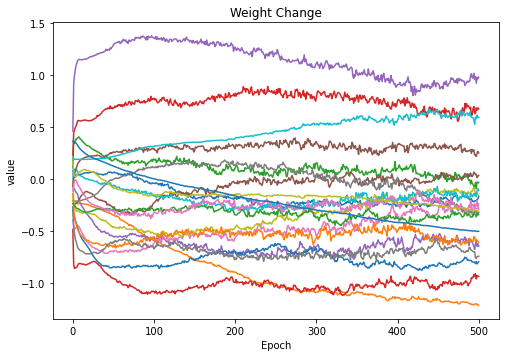

In [17]:
# write your code here
# print(output_node_w)
x= np.arange(0,len(output_node_w))
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplot(2,1,1)
plt.plot(x, output_node_w[:,:,0])
plt.title('Weight Change')
plt.xlabel("Epoch") 
plt.ylabel("value") 


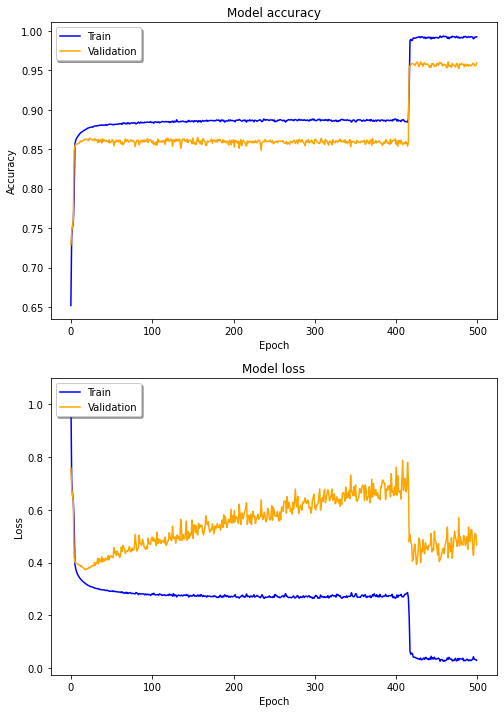

In [18]:
# write your code here
x= np.arange(0,len(train_acc))
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplot(2,1,1)
plt.plot(x, train_acc, color='Blue', label='Train')
plt.plot(x, test_acc, color='Orange', label='Validation')
plt.title('Model accuracy')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy") 

plt.legend(loc='upper left', shadow=True) 

plt.subplot(2,1,2)
plt.plot(x, train_loss, color='Blue', label='Train')
plt.plot(x, test_loss, color='Orange', label='Validation')
plt.title('Model loss')
plt.xlabel("Epoch") 
plt.ylabel("Loss") 

plt.legend(loc='upper left', shadow=True) 

##########################################

In [ ]:
error_cnt = 0
for i, input_data in enumerate(test_data):
  # print(i, "'s data !!!")
  # print(input_data)
  p_data = preprocess_input(input_data)
  # print(p_data)
  test_m.cal_network(p_data[:14])
  ans = test_m.get_result()
  # print(i ,test_m.get_loss())
  # print(ans, p_data[len(p_data)-1][0])
  if abs(ans - p_data[len(p_data)-1][0]) > 0.5:
    error_cnt += 1
  # test_m.adjust_model(p_data[len(p_data)-1])
  # error.append(test_m.get_loss())
# test_m.get_loss()
# print(i, "'s data !!!")
input_data = test_data[0]
# print(input_data)
p_data = preprocess_input(input_data)[:14]
# print(p_data)
test_m.cal_network(p_data)
ans = test_m.get_result()
# print(i ,test_m.get_loss())
if abs(ans - p_data[len(p_data)-1][0]) > 0.5:
  error_cnt += 1
print(error_cnt)

In [ ]:
print(len(test_data))
print(p_data[len(p_data)-1][0])

In [ ]:
a = [[1, 3], [2, 4]]
b = [1, 3]
for i in a:
  print(len(i))
w = 2*np.random.random((10))
print(w)
# for i in b:
#   print(len(i))
# print(len(a.shape))
# print(len(b.shape))
print(np.tile(b, (3,)))
# preprocess_data = np.zeros((0,7))
# print(preprocess_data)
# preprocess_data = np.append(preprocess_data, [[0,1,2,3,4,5,6]], 0)
# preprocess_data = np.append(preprocess_data, [[1,1,2,3,4,5,6]], 0)
# print(preprocess_data)